In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]


C:\Users\priyn\anaconda3\envs\priyanshenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priyn\anaconda3\envs\priyanshenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priyn\anaconda3\envs\priyanshenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priyn\anaconda3\envs\priyanshenv\Lib\site-packages\sklearn\cluster\_kmeans.p

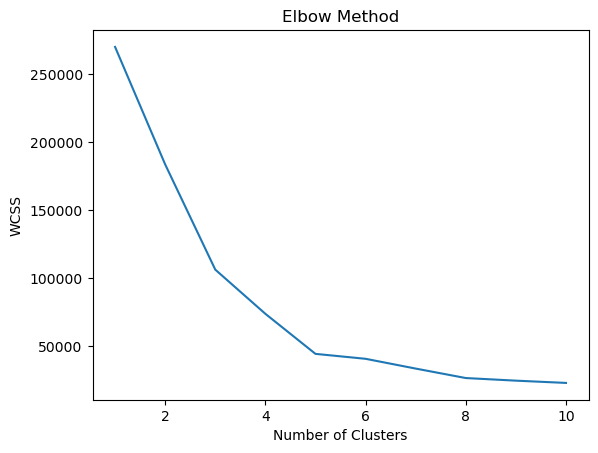

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)



C:\Users\priyn\anaconda3\envs\priyanshenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


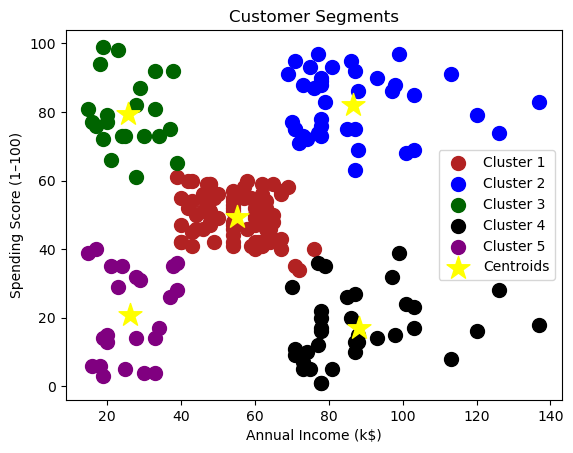

In [24]:
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=100, c='firebrick', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=100, c='darkgreen', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=100, c='black', label='Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s=100, c='purple', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*',label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()


| Cluster | Characteristics                         | Description                           |
| ------- | --------------------------------------- | ------------------------------------- |
| 3      | Young, low income, high spending        | 🎯 Target customers, impulsive buyers |
| 4       | Older, high income, low spending        | 💼 High earners but conservative      |
| 1       | Middle-aged, moderate income & spending | 🧍 Average customers                  |
| 2       | Young, high income, high spending       | 🤑 Ideal premium buyers               |
| 5       | Low income, low spending                | ⚠️ Least profitable segment           |
